## Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import seaborn as sns
warnings.filterwarnings('ignore')

<a id = 'Data'></a>
## Get the Data

In [2]:
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


<a id = 'EDA'></a>
## Data Exploration 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
print('Qualification:', train['Qualification'].nunique())
print('Experience:', train['Experience'].nunique())
print('Rating:', train['Rating'].nunique())
print('Place:', train['Place'].nunique())
print('Profile', train['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


## Data Visualization

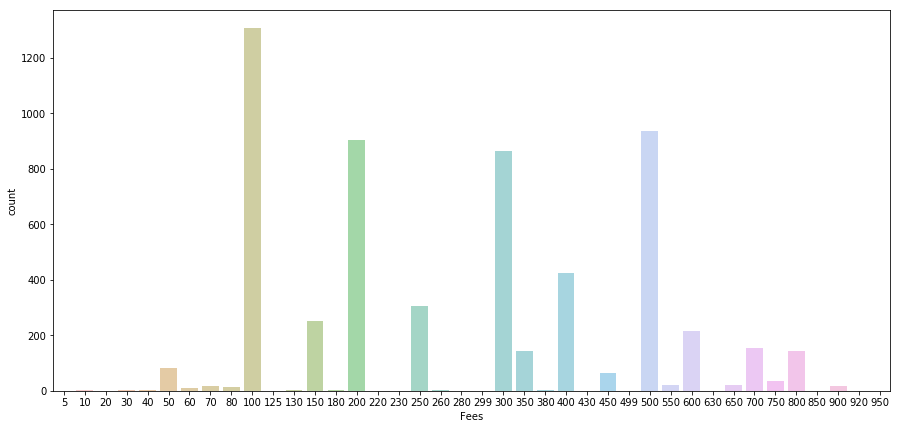

In [89]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(train['Fees'].sort_values(), ax=ax, alpha=0.5)
plt.show()

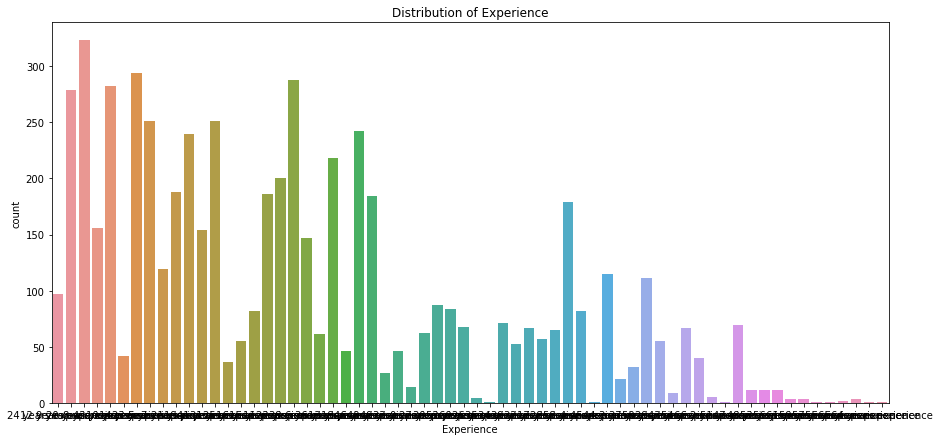

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(train['Experience'], ax=ax)
ax.set(title='Distribution of Experience')
plt.show()

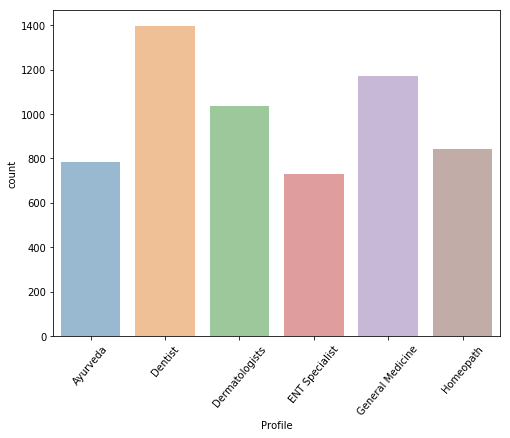

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(train['Profile'].sort_values(), ax=ax, alpha=0.5)
plt.xticks(rotation=50)
plt.show()

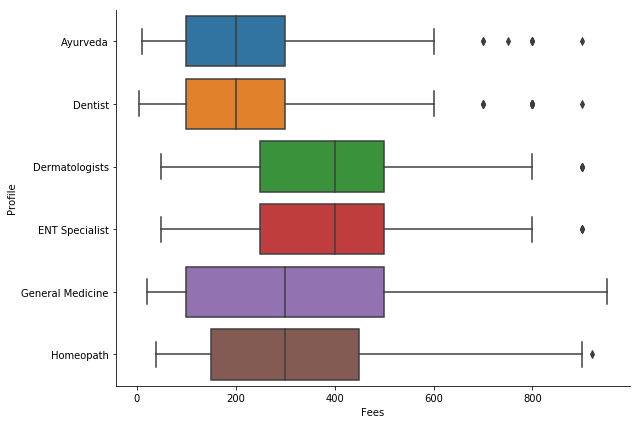

In [93]:
sns.catplot(x='Fees', y='Profile', data=train.sort_values("Profile"), kind='box', height=6, aspect= 1.5)
plt.show()

## Data Pre-processing

In [6]:
df_train = train[['Qualification', 'Profile', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating','Fees']]
df_test = test[['Qualification', 'Profile','Experience', 'Place', 'Miscellaneous_Info', 'Rating']]

In [7]:
df_train.head()

,Qualification,Profile,Experience,Place,Miscellaneous_Info,Rating,Fees
0,"BHMS, MD - Homeopathy",Homeopath,24 years experience,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100%,100
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,12 years experience,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",98%,350
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,9 years experience,"Mathikere - BEL, Bangalore",NaN,NaN,300
3,"BSc - Zoology, BAMS",Ayurveda,12 years experience,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",NaN,250
4,BAMS,Ayurveda,20 years experience,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",100%,250


In [8]:
df_train['Experience'] = df_train['Experience'].str.replace('years experience','').astype(int)
df_test['Experience'] = df_test['Experience'].str.replace('years experience','').astype(int)

In [9]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Qualification'] = df_train['Qualification'].apply(clean_text)
df_test['Qualification'] = df_test['Qualification'].apply(clean_text)

def clean_place(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Place'].fillna('missing', inplace=True)
df_test['Place'].fillna('missing', inplace=True)
df_train['Place'] = df_train['Place'].apply(clean_place)
df_test['Place'] = df_test['Place'].apply(clean_place)

In [10]:
df_train['Rating'].fillna('0%', inplace=True)
df_test['Rating'].fillna('0%', inplace=True)

def clean_rating(text):
    text = re.sub(r'%', '', str(text))
    return text

df_train['Rating'] = df_train['Rating'].apply(clean_rating)
df_train['Rating'] = df_train['Rating'].astype(int)

df_test['Rating'] = df_test['Rating'].apply(clean_rating)
df_test['Rating'] = df_test['Rating'].astype(int)

In [11]:
df_train['Miscellaneous_Info'].fillna('missing', inplace=True)
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df_train['Feedback'] = df_train['Miscellaneous_Info'].apply(get_feedback)
df_train['Feedback'] = df_train['Feedback'].str.replace(' Feedback','')
df_train['Feedback'] = df_train['Feedback'].astype(int)

df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In [12]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

df_train['Misc_Fees'] = df_train['Miscellaneous_Info'].apply(get_fee)
df_train['Misc_Fees'] = df_train['Misc_Fees'].str.replace('₹','')
df_train['Misc_Fees'].fillna(50, inplace=True)
df_train['Misc_Fees'] = df_train['Misc_Fees'].astype(int)

df_test['Misc_Fees'] = df_test['Miscellaneous_Info'].apply(get_fee)
df_test['Misc_Fees'] = df_test['Misc_Fees'].str.replace('₹','')
df_test['Misc_Fees'].fillna(50, inplace=True)
df_test['Misc_Fees'] = df_test['Misc_Fees'].astype(float)

In [13]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Miscellaneous_Info'] = df_train['Miscellaneous_Info'].apply(clean_misc)
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_misc)

In [14]:
df_train = pd.get_dummies(df_train, columns=['Profile'])
df_test  = pd.get_dummies(df_test,  columns=['Profile'])

In [15]:
df_train.head()

,Qualification,Experience,Place,Miscellaneous_Info,Rating,Fees,Feedback,Misc_Fees,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,bhms md homeopathy,24,kakkanad ernakulam,100 16 feedback kakkanad ernakulam,100,100,16,50,0,0,0,0,0,1
1,bams md ayurveda medicine,12,whitefield bangalore,98 76 feedback whitefield bangalore,98,350,76,50,1,0,0,0,0,0
2,mbbs ms otorhinolaryngology,9,mathikere bel bangalore,missing,0,300,0,50,0,0,0,1,0,0
3,bsc zoology bams,12,bannerghatta road bangalore,bannerghatta road bangalore 250 available on s...,0,250,0,250,1,0,0,0,0,0
4,bams,20,keelkattalai chennai,100 4 feedback keelkattalai chennai,100,250,4,50,1,0,0,0,0,0


<a id='algo prepare'></a>
## Preparing Data for ML Algorithms


In [16]:
X = df_train.drop(labels=['Fees'], axis=1)
y = df_train['Fees'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)

In [17]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((4470, 13), (4470,), (1491, 13), (1491,))

In [40]:
X_train.columns

Index(['Qualification', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating',
       'Feedback', 'Misc_Fees', 'Profile_Ayurveda', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath'],
      dtype='object')

### Build model

In [41]:
X_train_qual = X_train['Qualification']
X_cv_qual = X_cv['Qualification']

X_train_place = X_train['Place']
X_cv_place = X_cv['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_cv_misc = X_cv['Miscellaneous_Info']

from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_cv_qual = tf1.transform(X_cv_qual)

tf2 = TfidfVectorizer()
X_train_place = tf2.fit_transform(X_train_place)
X_cv_place = tf2.transform(X_cv_place)

tf3 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf3.fit_transform(X_train_misc)
X_cv_misc = tf3.transform(X_cv_misc)

In [42]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_cv_exp = np.array(X_cv['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_cv_feedback = np.array(X_cv['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_cv_rating = np.array(X_cv['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine',
       ]
X_train_prof = X_train[cols]
X_cv_prof = X_cv[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_cv_miscfees = np.array(X_cv['Misc_Fees']).reshape(-1,1)

In [43]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [44]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_cv  = hstack((X_cv_exp, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc, X_cv_miscfees))

In [45]:
merged_train.shape, merged_cv.shape

((5961, 9981), (1491, 9981))

In [46]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_cv)
y_pred1 = y_pred1.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred1)))

[14:58:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 0.29047678009789546


In [47]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 152,   
         'learning_rate': 0.1,  
         'num_leaves': 52, 
         'max_depth': 28, 
         'min_data_in_leaf': 3, 
         'feature_fraction': 0.66,  
         'feature_fraction_seed': 10,
         'drop_seed': 4,
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 verbose_eval=0,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred2 = lgbm.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred2)))

RMSLE: 0.4588113565592904


In [48]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, 
                      verbose=0)
br.fit(merged_train, y_train)
y_pred5 = br.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred5)))
print('RMSE:', sqrt(mean_squared_error(y_cv, y_pred5)))
#     0.58019310689049

RMSLE: 0.28181263290150566
RMSE: 63.523160272729


In [49]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_feedback, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc))
merged_cv  = hstack((X_cv_exp, X_cv_feedback, X_cv_qual, X_cv_prof, X_cv_place, X_cv_rating, X_cv_misc))

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2,  
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11,  
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(merged_train, y_train)
y_pred3 = gb.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred3)))

RMSLE: 0.4634450066367005


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29,  
                           criterion='mse', 
                           max_depth=58,  
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20,  
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11)  
rf.fit(merged_train, y_train)
y_pred4 = rf.predict(merged_cv)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred4))) 

RMSLE: 0.35160070891077877


In [52]:
y_predx = y_pred1*.4 + y_pred2*0.5 + y_pred3*0.1
y_predx = y_predx.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predx)))

RMSLE: 0.38765317246429554


In [53]:
y_predy = y_pred1*0.40 + y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_predy)))

RMSLE: 0.3766277773836543


In [54]:
y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)
print('RMSLE:', sqrt(mean_squared_log_error(y_cv, y_pred)))

RMSLE: 0.38602615222250897


# predict on test set

In [55]:
X_train = df_train.drop(labels='Fees', axis=1)
y_train = df_train['Fees'].values

X_test = df_test

In [56]:
X_train_qual = X_train['Qualification']
X_test_qual = X_test['Qualification']

X_train_place = X_train['Place']
X_test_place = X_test['Place']

X_train_misc = X_train['Miscellaneous_Info']
X_test_misc = X_test['Miscellaneous_Info']

from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1,2), binary=True, token_pattern=r'\w{3,}')
X_train_qual = tf1.fit_transform(X_train_qual)
X_test_qual = tf1.transform(X_test_qual)

tf3 = TfidfVectorizer()
X_train_place = tf3.fit_transform(X_train_place)
X_test_place = tf3.transform(X_test_place)

tf4 = TfidfVectorizer(token_pattern=r'\w{1,}', ngram_range=(1,2))
X_train_misc = tf4.fit_transform(X_train_misc)
X_test_misc = tf4.transform(X_test_misc)

In [57]:
X_train_exp = np.array(X_train['Experience']).reshape(-1,1)
X_test_exp = np.array(X_test['Experience']).reshape(-1,1)

X_train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
X_test_feedback = np.array(X_test['Feedback']).reshape(-1,1)

X_train_rating = np.array(X_train['Rating']).reshape(-1,1)
X_test_rating = np.array(X_test['Rating']).reshape(-1,1)

cols = ['Profile_Dentist', 'Profile_Dermatologists', 'Profile_ENT Specialist', 'Profile_General Medicine'
       ]
X_train_prof = X_train[cols]
X_test_prof = X_test[cols]

X_train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
X_test_miscfees = np.array(X_test['Misc_Fees']).reshape(-1,1)

In [58]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc, X_train_miscfees))
merged_test  = hstack((X_test_exp, X_test_qual, X_test_prof, X_test_place, X_test_rating, X_test_misc, X_test_miscfees))

In [59]:
merged_train.shape, merged_test.shape

((5961, 9981), (1987, 9981))

In [60]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, 
                   gamma=100, 
                   max_depth=25,  
                   min_child_weight=1, 
                   max_delta_step=0, 
                   subsample=0.75,  
                   colsample_bylevel=0.95,  
                   colsample_bytree=0.70,  
                   reg_lambda=1)
xgb.fit(merged_train, y_train)
y_pred1 = xgb.predict(merged_test)

[15:01:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)

param = {'objective': 'regression',
         'boosting': 'dart',
         'num_iterations': 137,   
         'learning_rate': 0.1,
         'num_leaves': 52,   
         'max_depth': 33,   
         'min_data_in_leaf': 3,  
         'feature_fraction': 0.54,  
         'feature_fraction_seed': 50,  
         'alpha': 100,
         'max_bin': 7,
         'min_data_in_bin': 45,   
         'metric': 'l2_root'
         }

lgbm = lgb.train(params=param,
                 train_set=train_data)

y_pred2 = lgbm.predict(merged_test)

In [62]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(base_estimator=None, 
                      n_estimators=80,  
                      max_samples=1.0, 
                      max_features=1.0, 
                      bootstrap=True, 
                      bootstrap_features=True,
                      oob_score=True,
                      n_jobs=None, 
                      random_state=13, #4
                      verbose=0)
br.fit(merged_train, y_train)
y_pred5 = br.predict(merged_test)

In [63]:
from scipy.sparse import hstack
merged_train = hstack((X_train_exp, X_train_feedback, X_train_qual, X_train_prof, X_train_place, X_train_rating, X_train_misc))
merged_test  = hstack((X_test_exp, X_test_feedback, X_test_qual, X_test_prof, X_test_place, X_test_rating, X_test_misc))

In [64]:
merged_train.shape, merged_test.shape

((5961, 9981), (1987, 9981))

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='lad', 
                               learning_rate=0.2, #0.2
                               random_state=10, 
                               n_estimators=92,   
                               max_depth=11, #11, 
                               subsample=1.0, 
                               min_samples_split=40, 
                               min_samples_leaf=1,
                               max_features='auto')
gb.fit(merged_train, y_train)
y_pred3 = gb.predict(merged_test)

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=29, #25, 29
                           criterion='mse', 
                           max_depth=58, #55, 58
                           min_samples_split=5, 
                           min_samples_leaf=2, 
                           min_weight_fraction_leaf=0.0, 
                           max_features='auto', 
                           max_leaf_nodes=None, 
                           min_impurity_decrease=0.20, #0.20, 
                           bootstrap=True, 
                           oob_score=True, 
                           n_jobs=-1, 
                           random_state=11) 
rf.fit(merged_train, y_train)
y_pred4 = rf.predict(merged_test)

In [67]:
y_pred1.shape, y_pred2.shape, y_pred3.shape, y_pred4.shape, y_pred5.shape

((1987,), (1987,), (1987,), (1987,), (1987,))

In [68]:
y_predx = y_pred1*.4 + y_pred2*0.5 + y_pred3*0.10
y_predx = y_predx.astype(int)

In [69]:
y_predy = y_pred1*0.40 + y_pred2*0.45 + y_pred3*0.10 + y_pred5*0.05
y_predy = y_predy.astype(int)

In [70]:
y_pred = y_predx*.98 + y_predy*0.02
y_pred = y_pred.astype(int)

In [81]:
y_pred

array([166, 237, 311, ..., 242, 186, 371])

## write predictions to output file

In [82]:
df_sub = pd.DataFrame(data=y_pred, columns=['Fees'])
writer = pd.ExcelWriter('output74.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

## RESULT 

In [88]:
result = pd.read_excel('output74.xlsx')

In [87]:
result.head()

,Fees
0,166
1,237
2,311
3,173
4,254
